# **Project Overview**
**This notebook implements the Faster R-CNN architecture from the ground up using PyTorch. This is a two-stage detector that focuses on high-accuracy localization and classification by integrating a Region Proposal Network (RPN) with a Fast R-CNN detector.**

**Key Features**

**Backbone: VGG16 architecture for robust feature extraction.**

**Region Proposal Network (RPN): End-to-end proposal generation with anchor boxes.**

**ROI Head: Classification and bounding box regression for final detections.**

**Full Pipeline: Includes automated data preprocessing, training loops with loss tracking, and visual inference.**

## *🔗 Repository & Resources*
https://github.com/WA-on-test2/Faster-R-CNN-From-Scratch-.git

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pascal-voc-2007-dataset/VOCdevkit2007/devkit_doc_07-Jun-2007.pdf
/kaggle/input/pascal-voc-2007-dataset/VOCdevkit2007/VOC2007/SegmentationObject/005647.png
/kaggle/input/pascal-voc-2007-dataset/VOCdevkit2007/VOC2007/SegmentationObject/000121.png
/kaggle/input/pascal-voc-2007-dataset/VOCdevkit2007/VOC2007/SegmentationObject/005911.png
/kaggle/input/pascal-voc-2007-dataset/VOCdevkit2007/VOC2007/SegmentationObject/000039.png
/kaggle/input/pascal-voc-2007-dataset/VOCdevkit2007/VOC2007/SegmentationObject/000491.png
/kaggle/input/pascal-voc-2007-dataset/VOCdevkit2007/VOC2007/SegmentationObject/004241.png
/kaggle/input/pascal-voc-2007-dataset/VOCdevkit2007/VOC2007/SegmentationObject/002273.png
/kaggle/input/pascal-voc-2007-dataset/VOCdevkit2007/VOC2007/SegmentationObject/006661.png
/kaggle/input/pascal-voc-2007-dataset/VOCdevkit2007/VOC2007/SegmentationObject/007003.png
/kaggle/input/pascal-voc-2007-dataset/VOCdevkit2007/VOC2007/SegmentationObject/007996.png
/kaggle/input/pascal-

In [25]:
from pathlib import Path
from IPython.display import Image, display
import glob

## **Clone My GitHub Repo**


In [48]:
!git clone https://github.com/WA-on-test2/Faster-R-CNN-From-Scratch-.git

Cloning into 'Faster-R-CNN-From-Scratch-'...
remote: Enumerating objects: 156, done.
remote: Counting objects: 100% (156/156), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 156 (delta 66), reused 133 (delta 46), pack-reused 0 (from 0)
Receiving objects: 100% (156/156), 37.44 KiB | 4.68 MiB/s, done.
Resolving deltas: 100% (66/66), done.


In [49]:
%cd Faster-R-CNN-From-Scratch-

/kaggle/working/Faster-R-CNN-From-Scratch-/Faster-R-CNN-From-Scratch-/Faster-R-CNN-From-Scratch-/Faster-R-CNN-From-Scratch-/Faster-R-CNN-From-Scratch-


In [50]:
!ls

config	controllers  core  data  README.md  requirements.txt  scripts  utils


## **Setup dataset paths**

In [12]:
dataset_base = '/kaggle/input/pascal-voc-2007-dataset/VOCdevkit2007/VOC2007'
if os.path.exists(dataset_base):
    print(f" Dataset found at: {dataset_base}")
    print(f" Images: {dataset_base}/JPEGImages")
    print(f" Annotations: {dataset_base}/Annotations")
else:
    print("Dataset not found")

 Dataset found at: /kaggle/input/pascal-voc-2007-dataset/VOCdevkit2007/VOC2007
 Images: /kaggle/input/pascal-voc-2007-dataset/VOCdevkit2007/VOC2007/JPEGImages
 Annotations: /kaggle/input/pascal-voc-2007-dataset/VOCdevkit2007/VOC2007/Annotations


In [18]:
imagesets_path = f"{dataset_base}/ImageSets/Main"
train_dir = "/kaggle/working/VOC2007_train"
test_dir  = "/kaggle/working/VOC2007_test"

def read_ids(file):
    return [l.strip() for l in open(file)]

train_ids = read_ids(f"{imagesets_path}/train.txt")
test_ids  = read_ids(f"{imagesets_path}/val.txt")

print(f"Found {len(train_ids)} training images, {len(test_ids)} test images")

def create_links(ids, split_dir):
    img_dst = Path(split_dir) / "JPEGImages"
    ann_dst = Path(split_dir) / "Annotations"
    img_dst.mkdir(parents=True, exist_ok=True)
    ann_dst.mkdir(parents=True, exist_ok=True)

    for img_id in ids:
        img_link = img_dst / f"{img_id}.jpg"
        ann_link = ann_dst / f"{img_id}.xml"

        if not img_link.exists():
            img_link.symlink_to(f"{dataset_base}/JPEGImages/{img_id}.jpg")
        if not ann_link.exists():
            ann_link.symlink_to(f"{dataset_base}/Annotations/{img_id}.xml")
create_links(train_ids, train_dir)
create_links(test_ids, test_dir)

print(f"Train set: {len(train_ids)} images")
print(f"Test set: {len(test_ids)} images")


Found 2501 training images, 2510 test images
Train set: 2501 images
Test set: 2510 images


## **Execute the train_model.py script using Kaggle-specific config.**

In [19]:
!python -m scripts.train_model --config config/voc_kaggle.yaml

{0: 'background', 1: 'aeroplane', 2: 'bicycle', 3: 'bird', 4: 'boat', 5: 'bottle', 6: 'bus', 7: 'car', 8: 'cat', 9: 'chair', 10: 'cow', 11: 'diningtable', 12: 'dog', 13: 'horse', 14: 'motorbike', 15: 'person', 16: 'pottedplant', 17: 'sheep', 18: 'sofa', 19: 'train', 20: 'tvmonitor'}
100%|██████████████████████████████████████| 2501/2501 [00:07<00:00, 319.50it/s]
Total 2501 images found
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn

## **Execute evaluate_model.py script**

In [51]:
!python -m scripts.evaluate_model --config config/voc_kaggle.yaml

{0: 'background', 1: 'aeroplane', 2: 'bicycle', 3: 'bird', 4: 'boat', 5: 'bottle', 6: 'bus', 7: 'car', 8: 'cat', 9: 'chair', 10: 'cow', 11: 'diningtable', 12: 'dog', 13: 'horse', 14: 'motorbike', 15: 'person', 16: 'pottedplant', 17: 'sheep', 18: 'sofa', 19: 'train', 20: 'tvmonitor'}
100%|█████████████████████████████████████| 2510/2510 [00:01<00:00, 1264.39it/s]
Total 2510 images found
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn

## **Execute run_inference.py script**

In [33]:
!python -m scripts.run_inference --config config/voc_kaggle.yaml --num_samples 30 --output_dir /kaggle/working/inference_samples

{0: 'background', 1: 'aeroplane', 2: 'bicycle', 3: 'bird', 4: 'boat', 5: 'bottle', 6: 'bus', 7: 'car', 8: 'cat', 9: 'chair', 10: 'cow', 11: 'diningtable', 12: 'dog', 13: 'horse', 14: 'motorbike', 15: 'person', 16: 'pottedplant', 17: 'sheep', 18: 'sofa', 19: 'train', 20: 'tvmonitor'}
100%|█████████████████████████████████████| 2510/2510 [00:01<00:00, 1498.34it/s]
Total 2510 images found
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn

## **Visualizing Predictions vs. Ground Truth**


--- Sample 1 ---
Ground Truth:


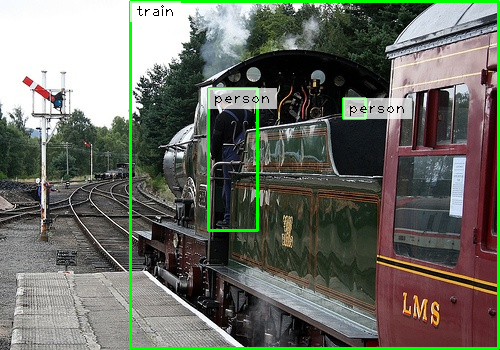


Prediction:


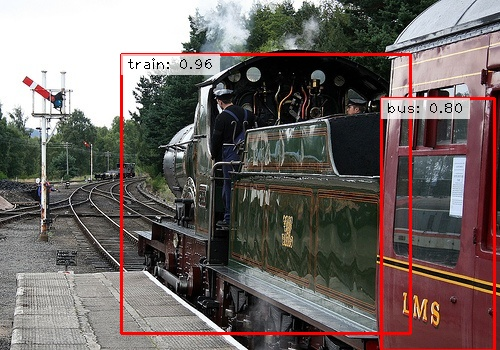


--- Sample 2 ---
Ground Truth:


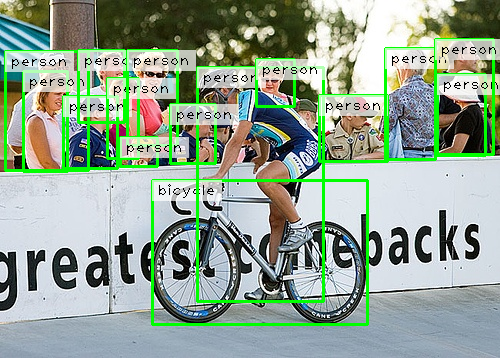


Prediction:


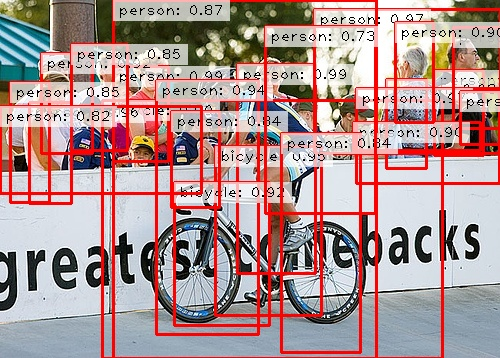

In [36]:
inference_dir = '/kaggle/working/inference_samples'
if not os.path.exists(inference_dir):
    inference_dir = 'inference_samples'

pred_images = sorted(glob.glob(f'{inference_dir}/prediction_*.jpg'))[20:22]
gt_images = sorted(glob.glob(f'{inference_dir}/ground_truth_*.png'))[20:22]
    

for i, (pred, gt) in enumerate(zip(pred_images, gt_images)):
    print(f"\n--- Sample {i+1} ---")
    print("Ground Truth:")
    display(Image(gt, width=600))
    print("\nPrediction:")
    display(Image(pred, width=600))


--- Sample 1 ---
Ground Truth:


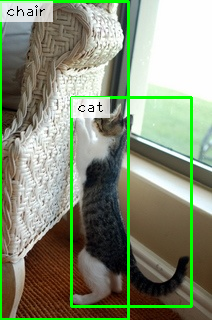


Prediction:


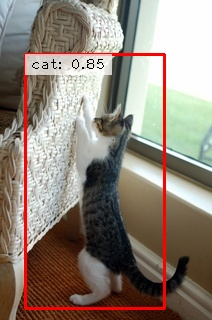


--- Sample 2 ---
Ground Truth:


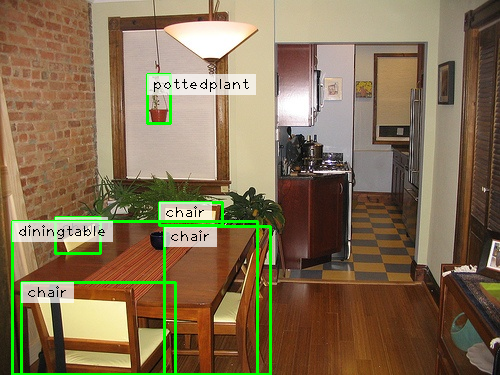


Prediction:


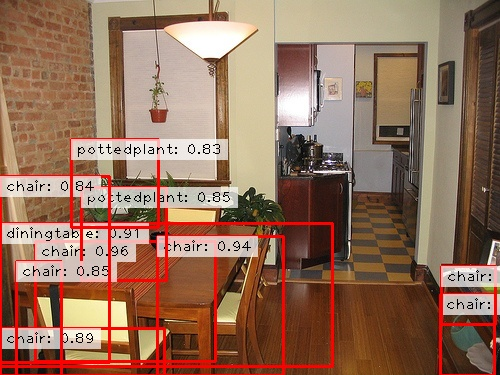


--- Sample 3 ---
Ground Truth:


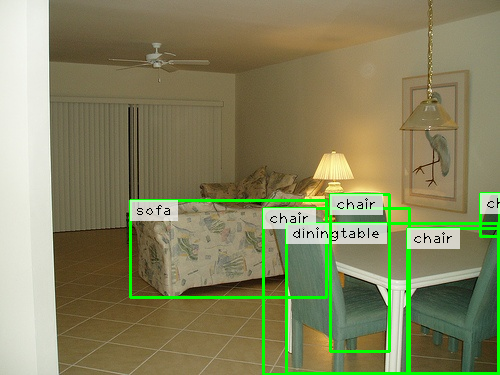


Prediction:


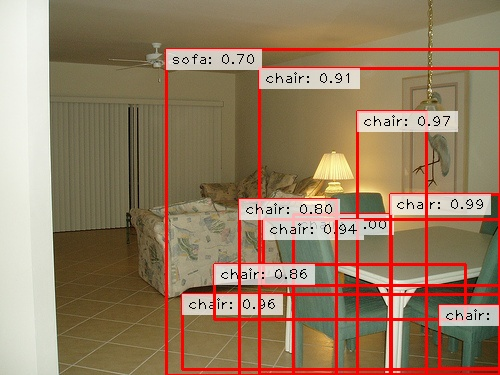

In [60]:
inference_dir = '/kaggle/working/inference_samples'
if not os.path.exists(inference_dir):
    inference_dir = 'inference_samples'

pred_images = sorted(glob.glob(f'{inference_dir}/prediction_*.jpg'))[26:29]
gt_images = sorted(glob.glob(f'{inference_dir}/ground_truth_*.png'))[26:29]
    

for i, (pred, gt) in enumerate(zip(pred_images, gt_images)):
    print(f"\n--- Sample {i+1} ---")
    print("Ground Truth:")
    display(Image(gt, width=600))
    print("\nPrediction:")
    display(Image(pred, width=600))

In [54]:
!python -m scripts.run_inference --config config/voc_kaggle.yaml --num_samples 100 --output_dir /kaggle/working/inference_samples

{0: 'background', 1: 'aeroplane', 2: 'bicycle', 3: 'bird', 4: 'boat', 5: 'bottle', 6: 'bus', 7: 'car', 8: 'cat', 9: 'chair', 10: 'cow', 11: 'diningtable', 12: 'dog', 13: 'horse', 14: 'motorbike', 15: 'person', 16: 'pottedplant', 17: 'sheep', 18: 'sofa', 19: 'train', 20: 'tvmonitor'}
100%|█████████████████████████████████████| 2510/2510 [00:01<00:00, 1509.27it/s]
Total 2510 images found
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn


--- Sample 1 ---
Ground Truth:


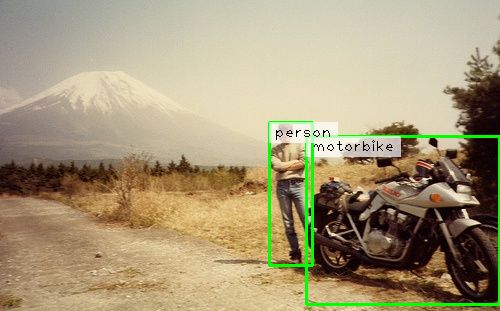


Prediction:


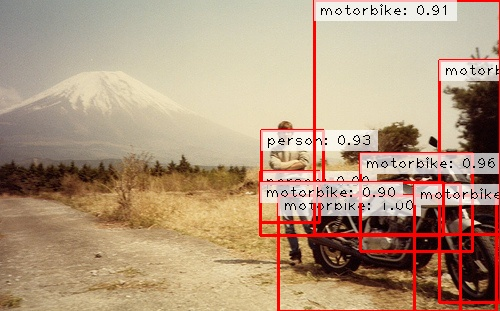


--- Sample 2 ---
Ground Truth:


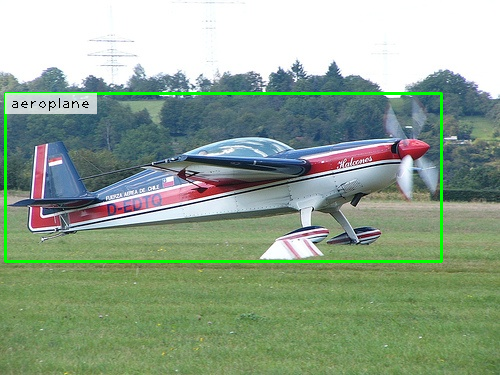


Prediction:


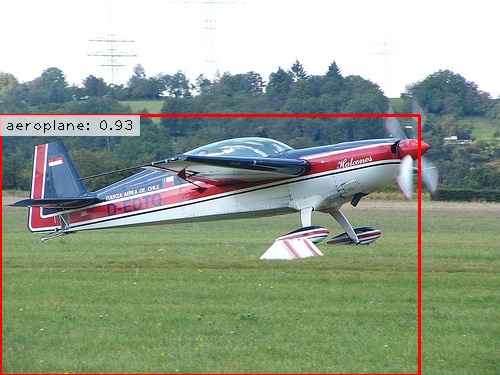


--- Sample 3 ---
Ground Truth:


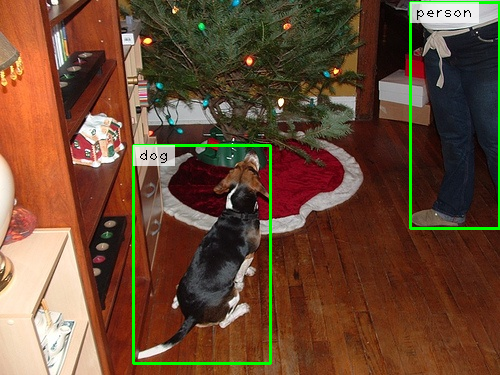


Prediction:


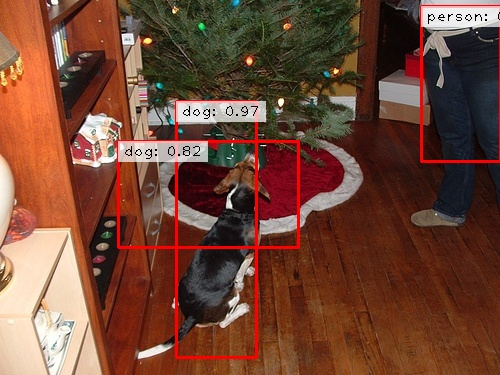

In [59]:
inference_dir = '/kaggle/working/inference_samples'
if not os.path.exists(inference_dir):
    inference_dir = 'inference_samples'

pred_images = sorted(glob.glob(f'{inference_dir}/prediction_*.jpg'))[70:73]
gt_images = sorted(glob.glob(f'{inference_dir}/ground_truth_*.png'))[70:73]
    

for i, (pred, gt) in enumerate(zip(pred_images, gt_images)):
    print(f"\n--- Sample {i+1} ---")
    print("Ground Truth:")
    display(Image(gt, width=600))
    print("\nPrediction:")
    display(Image(pred, width=600))